<a href="https://colab.research.google.com/github/YazhiniSiVakumar22/github1/blob/main/SALES_DATA_ANALYST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# load dataset
df=pd.read_csv("/train.csv")


In [ ]:
# display the first few rows

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#columns and rows
df.shape

(9789, 21)

In [ ]:
# Getting the overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     0 non-null      datetime64[ns]
 3   Ship Date      9789 non-null   object        
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,9789
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.describe()


,Row ID,Order Date,Postal Code,Sales,Month,Year,Day
count,9789.000000,0,9789.000000,9789.000000,0.0,0.0,0.0
mean,4896.705588,NaT,55273.322403,230.116193,NaN,NaN,NaN
min,1.000000,NaT,1040.000000,0.444000,NaN,NaN,NaN
25%,2449.000000,NaT,23223.000000,17.248000,NaN,NaN,NaN
50%,4896.000000,NaT,58103.000000,54.384000,NaN,NaN,NaN
75%,7344.000000,NaT,90008.000000,210.392000,NaN,NaN,NaN
max,9800.000000,NaT,99301.000000,22638.480000,NaN,NaN,NaN
std,2827.486899,NaN,32041.223413,625.302079,NaN,NaN,NaN


In [ ]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column

#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

<ipython-input-53-4870b25d07ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Sales',y='City', data=top_cities, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

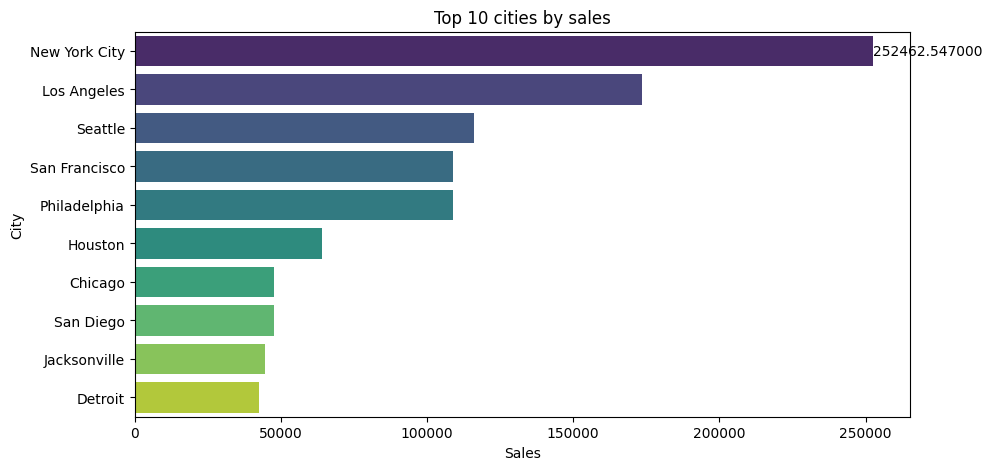

In [ ]:
# top 10 cities by sales
top_cities=df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Sales',y='City', data=top_cities, palette="viridis")
ax.bar_label(ax.containers[0],fmt="%2f",fontsize=10,color='black')
plt.title("Top 10 cities by sales")
plt.xlabel('Sales')
plt.ylabel('City')
plt.show

<ipython-input-56-d0010e1ed845>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Sales',y='State',data=top_states,palette="viridis")


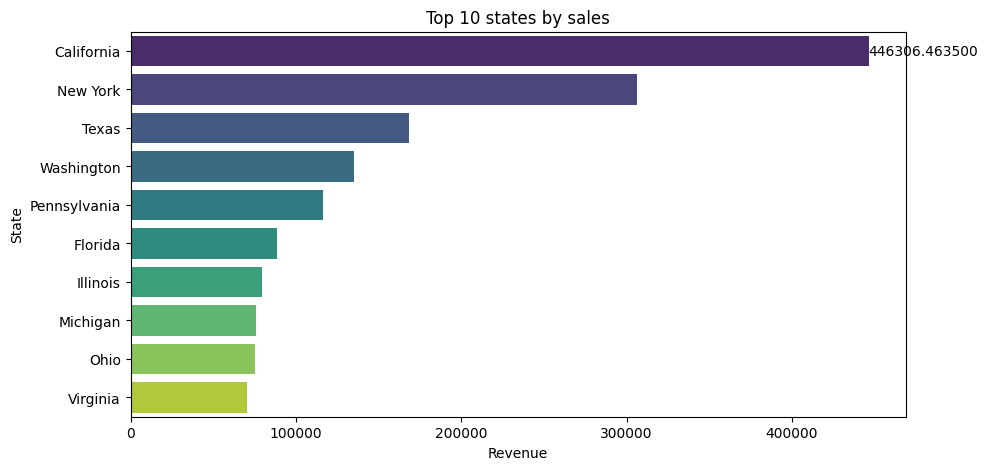

In [ ]:
# top 10 states by sales
top_states=df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Sales',y='State',data=top_states,palette="viridis")
ax.bar_label(ax.containers[0],fmt="%2f",fontsize=10,color='black')
plt.title("Top 10 states by sales")
plt.xlabel('Revenue')
plt.ylabel('State')
plt.show()



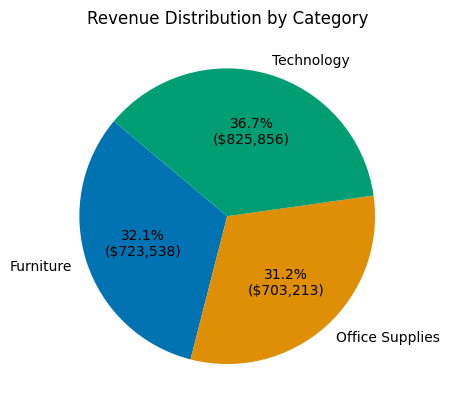

In [ ]:
# revenue by category
revenue_by_category=df.groupby('Category')['Sales'].sum()
#we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(pct, all_values):
  total=sum(all_values)
  absolute=int(round(pct*total/100))  #Convert percentage to absolute value
  return f"{pct:.1f}%\n(${absolute:,})" ## Format with thousands separator

plt.pie(revenue_by_category, labels=revenue_by_category.index,
        autopct=lambda pct: autopct_format(pct, revenue_by_category),
        startangle=140,colors=sns.color_palette('colorblind'))
plt.title("Revenue Distribution by Category")
plt.show()

